In [20]:
#libraries needed
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
np.set_printoptions(precision=5, suppress=True)

In [7]:
#load the MPIA data

MPIA_data = pd.read_excel("MPIAssignment.xlsx")
MPIA_data = MPIA_data.iloc[:,:12]
MPIA_data.head()

C:\Users\Think\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,FID,Prov_ID,Province,Dist_ID,District,Sect_ID,Sector,nightlight_sum,landscan_pop,mpi_headcount,mpi_intensity,mpi
0,0,1,Kigali City,11,Nyarugenge,1101,Gitega,101.297202,30758,0.064,0.412,0.027
1,1,1,Kigali City,11,Nyarugenge,1102,Kanyinya,85.060422,19802,0.282,0.445,0.126
2,2,1,Kigali City,11,Nyarugenge,1103,Kigali,133.991142,26452,0.212,0.434,0.092
3,3,1,Kigali City,11,Nyarugenge,1104,Kimisagara,161.933015,62266,0.081,0.409,0.033
4,4,1,Kigali City,11,Nyarugenge,1105,Mageregere,49.415699,23144,0.369,0.430,0.159


In [18]:
numeric_colummns = ['nightlight_sum','landscan_pop','mpi_headcount','mpi_intensity','mpi']
MPIA_data[numeric_colummns].describe()

,nightlight_sum,landscan_pop,mpi_headcount,mpi_intensity,mpi
count,416.000000,416.000000,416.000000,416.000000,416.000000
mean,37.518715,28189.257212,0.379875,0.444382,0.170344
std,86.915931,10998.628426,0.116088,0.017566,0.055538
min,0.600450,7649.000000,0.047000,0.381000,0.018000
25%,3.289344,20813.750000,0.322750,0.434000,0.141000
50%,7.111642,26402.000000,0.393000,0.444000,0.173000
75%,20.087663,32761.750000,0.457250,0.456000,0.205250
max,597.629226,74297.000000,0.728000,0.494000,0.359000


nightlight_sum
landscan_pop
mpi_headcount
mpi_intensity
mpi


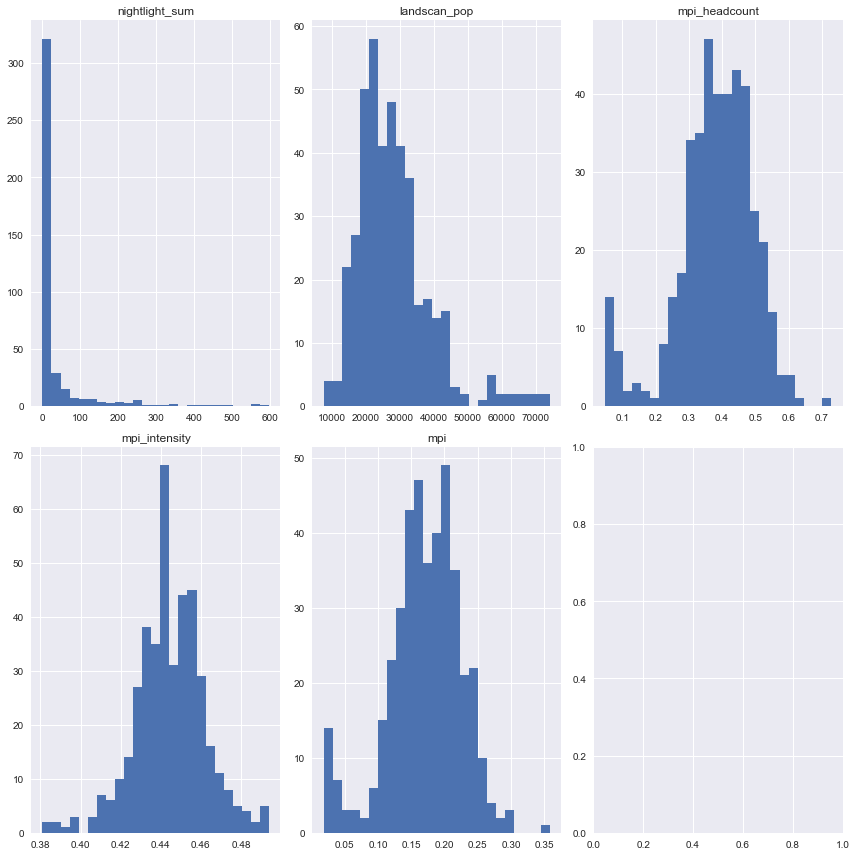

In [27]:
#histograms of all features
fig, axes = plt.subplots(2, 3, figsize=(12,12))
axes = axes.ravel()

for index,ax in enumerate(axes):
    
    print(numeric_colummns[index])
    ax.hist(MPIA_data[numeric_colummns[index]],bins=25)
    ax.set_title(numeric_colummns[index])
    if index==4:
        break

plt.tight_layout()

No handles with labels found to put in legend.


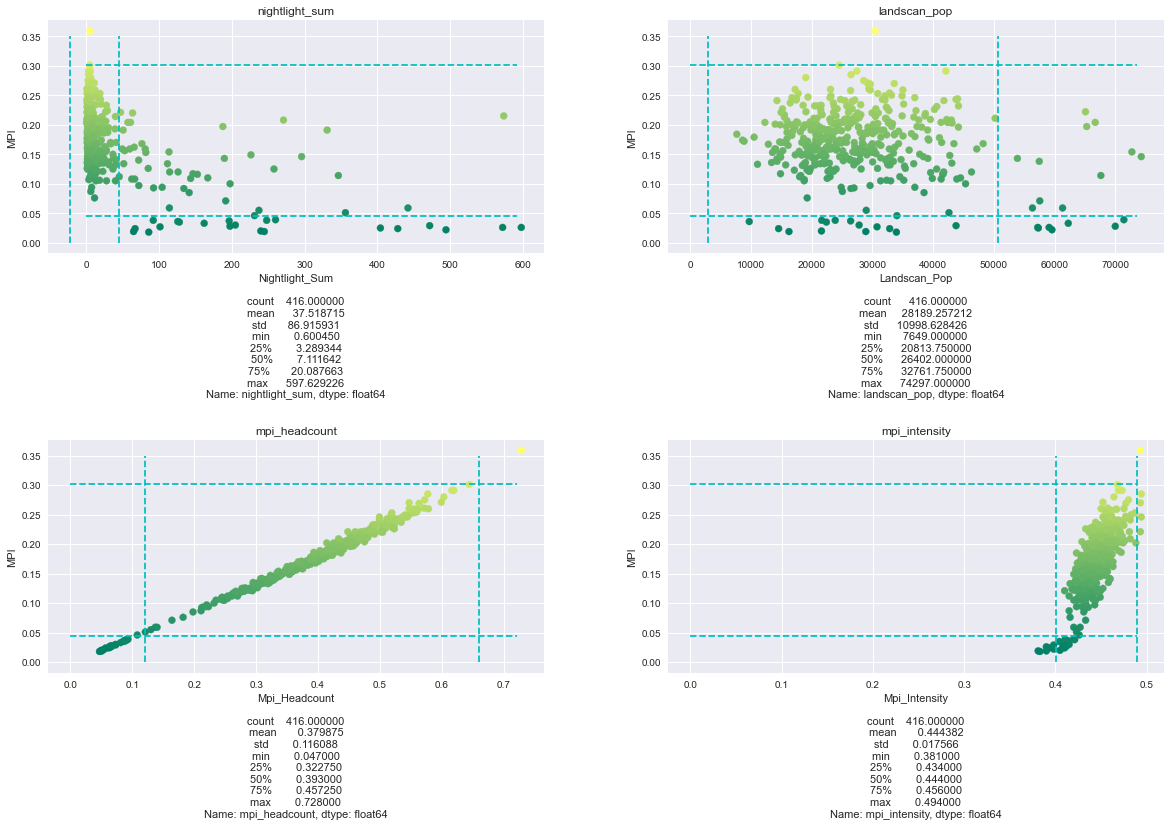

In [76]:
#scatter plots of MPI and other features
fig, axes = plt.subplots(2, 2, figsize=(20,12))
axes = axes.ravel()

for index,ax in enumerate(axes):
    ax.scatter(x=MPIA_data[numeric_colummns[index]],y=MPIA_data[numeric_colummns[4]],c=MPIA_data[numeric_colummns[4]],cmap='summer')

    IQR_x = MPIA_data[numeric_colummns[index]].quantile(0.75)-MPIA_data[numeric_colummns[index]].quantile(0.25)
    lower_bound_x = MPIA_data[numeric_colummns[index]].quantile(0.25)-1.5*IQR_x
    lower_x1 = np.ones(36)*lower_bound_x
    lower_y1 = np.array(range(36))/100
    ax.plot(lower_x1,lower_y1,c='c',ls='--')

    upper_bound_x = MPIA_data[numeric_colummns[index]].quantile(0.75)+1.5*IQR_x
    upper_x2 = np.ones(36)*upper_bound_x
    upper_y2 = np.array(range(36))/100
    ax.plot(upper_x2,upper_y2,c='c',ls='--')

    IQR_y = MPIA_data[numeric_colummns[4]].quantile(0.75)-MPIA_data[numeric_colummns[4]].quantile(0.25)
    lower_bound_y = MPIA_data[numeric_colummns[4]].quantile(0.25)-1.5*IQR_y
    param = MPIA_data[numeric_colummns[index]].max()/100
    lower_x3 = np.array(range(100))*param
    lower_y3 = np.ones(100)*lower_bound_y
    ax.plot(lower_x3,lower_y3,c='c',ls='--')

    upper_bound_y = MPIA_data[numeric_colummns[4]].quantile(0.75)+1.5*IQR_y
    upper_x4 = np.array(range(100))*param
    upper_y4 = np.ones(100)*upper_bound_y
    ax.plot(upper_x4,upper_y4,c='c',ls='--')

    ax.set_title(numeric_colummns[index])
    ax.set_xlabel(f"{numeric_colummns[index].title()}\n\n{MPIA_data.describe()[numeric_colummns[index]]}")
    ax.set_ylabel("MPI")

plt.subplots_adjust(wspace=0.25, hspace=0.8)
plt.legend(loc='upper left')

In [44]:
#correlations
MPIA_data2 = MPIA_data[numeric_colummns]
for col in numeric_colummns:
    new_col = 'log_'+col
    MPIA_data2[new_col] = MPIA_data2[col].apply(np.log)

#print(MPIA_data2.head())
corr1 = MPIA_data2[numeric_colummns].corr()['mpi']
corr2 = MPIA_data2[['log_nightlight_sum','log_landscan_pop','log_mpi_headcount','log_mpi_intensity','mpi']].corr()['mpi']
corr3 = MPIA_data2[['nightlight_sum','landscan_pop','mpi_headcount','mpi_intensity','log_mpi']].corr()['log_mpi']
corr4 = MPIA_data2[['log_nightlight_sum','log_landscan_pop','log_mpi_headcount','log_mpi_intensity','log_mpi']].corr()['log_mpi']
dict = {
    'X vs y': corr1.values,
    'log_X vs y': corr2.values,
    'X vs log_Y': corr3.values,
    'log_X vs log_Y': corr4.values
}
corr_df = pd.DataFrame(dict,index=numeric_colummns[:5])
corr_df

<ipython-input-44-3c2f9a68ee55>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MPIA_data2[new_col] = MPIA_data2[col].apply(np.log)


,X vs y,log_X vs y,X vs log_Y,log_X vs log_Y
nightlight_sum,-0.528349,-0.575816,-0.638927,-0.617078
landscan_pop,-0.172782,-0.113587,-0.223342,-0.160110
mpi_headcount,0.995378,0.922131,0.942200,0.998507
mpi_intensity,0.799883,0.803473,0.769113,0.781876
mpi,1.000000,1.000000,1.000000,1.000000


In [77]:
rw_nightlight = pd.read_excel("rw_nightlight_2015_07.xlsx")
rw_nightlight.head()

,OBJECTID,FID,COUNT,AREA,MIN,MAX,RANGE,MEAN,STD,SUM
0,1,0,5,0.000086,14.889998,26.718889,11.828891,20.259440,4.263810,101.297202
1,2,1,110,0.001903,0.130136,3.134233,3.004097,0.773277,0.607997,85.060422
2,3,2,137,0.002370,0.156065,6.990618,6.834553,0.978038,0.950469,133.991142
3,4,3,16,0.000277,2.069596,24.918432,22.848836,10.120813,6.568677,161.933015
4,5,4,248,0.004290,0.000000,1.451542,1.451542,0.199257,0.184615,49.415699


<ipython-input-81-b6063db72d83>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MPIA_data3['nightlight_per_capita'] = MPIA_data3['nightlight_sum']/MPIA_data3['landscan_pop']
<ipython-input-81-b6063db72d83>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MPIA_data3['population_density'] = MPIA_data3['landscan_pop']/rw_nightlight['AREA']


nightlight_per_capita
population_density
mpi


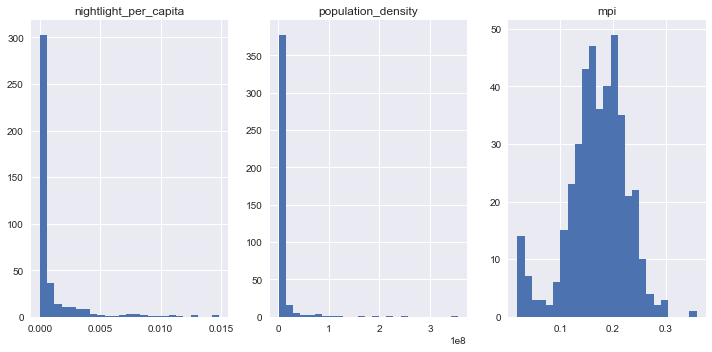

In [81]:
#construct new features
MPIA_data3 = MPIA_data[numeric_colummns]
MPIA_data3['nightlight_per_capita'] = MPIA_data3['nightlight_sum']/MPIA_data3['landscan_pop']
MPIA_data3['population_density'] = MPIA_data3['landscan_pop']/rw_nightlight['AREA']

new_features = ['nightlight_per_capita','population_density','mpi']
fig, axes = plt.subplots(1, 3, figsize=(10,5))
axes = axes.ravel()

for index,ax in enumerate(axes):
    
    print(new_features[index])
    ax.hist(MPIA_data3[new_features[index]],bins=25)
    ax.set_title(new_features[index])

plt.tight_layout()

In [82]:
#correlations again
for col in new_features:
    new_col = 'log_'+col
    MPIA_data3[new_col] = MPIA_data3[col].apply(np.log)

#print(MPIA_data2.head())
corr1 = MPIA_data3[new_features].corr()['mpi']
corr2 = MPIA_data3[['log_nightlight_per_capita','log_population_density','mpi']].corr()['mpi']
corr3 = MPIA_data3[['nightlight_per_capita','population_density','log_mpi']].corr()['log_mpi']
corr4 = MPIA_data3[['log_nightlight_per_capita','log_population_density','log_mpi']].corr()['log_mpi']
dict = {
    'X vs y': corr1.values,
    'log_X vs y': corr2.values,
    'X vs log_Y': corr3.values,
    'log_X vs log_Y': corr4.values
}
corr_df = pd.DataFrame(dict,index=new_features[:3])
corr_df

<ipython-input-82-4ddd9587e3e0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MPIA_data3[new_col] = MPIA_data3[col].apply(np.log)


,X vs y,log_X vs y,X vs log_Y,log_X vs log_Y
nightlight_per_capita,-0.546978,-0.605358,-0.660497,-0.638304
population_density,-0.487136,-0.617437,-0.668281,-0.745331
mpi,1.000000,1.000000,1.000000,1.000000


In [89]:
%pip install setuptools

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [1]:
%pip install regressors

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/80/5d/bacfcf2b3865305156e2507ed9a968cb6c7f326cad1d1720e60f80d02797/regressors-0.0.3.tar.gz (24 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [1 lines of output]
      error in regressors setup command: use_2to3 is invalid.
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
#build the model
train_data = MPIA_data3[['nightlight_per_capita','log_population_density','log_mpi']]

from regressors import stats
import statsmodels.api as sm